In [40]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [41]:
year = 2022 #GP year
gp = 'Jeddah' # GP name
event = 'FP1' # Q for qualifying, FP1 for free practice 1, R for race

In [42]:

# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
#fastf1.Cache.enable_cache('\cache')
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)


In [1]:
# Get qualification session
session = fastf1.get_session(year, gp, event)
session.load()
#laps.dropna(subset=['Driver'], inplace = True)
laps = session.laps.pick_accurate()

NameError: name 'fastf1' is not defined

In [44]:
# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

['VER' 'SAI' 'MSC' 'HAM' 'OCO' 'HUL' 'ZHO' 'ALB' 'TSU' 'STR' 'LEC' 'ALO'
 'PER' 'GAS' 'LAT' 'NOR' 'RIC' 'RUS' 'BOT']


In [45]:
# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

In [46]:
# Get all team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

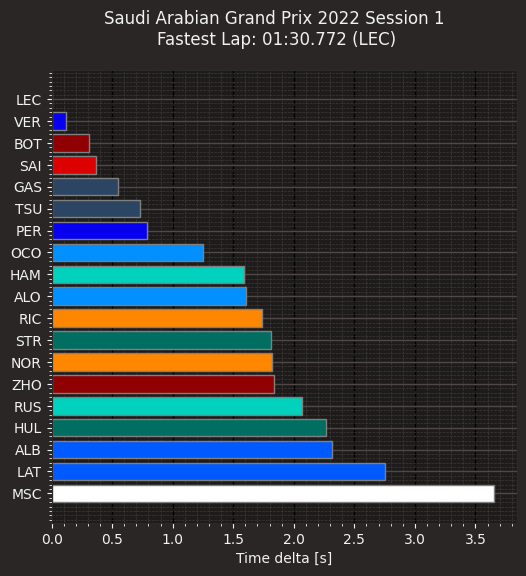

In [47]:
# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

['MSC' 'HUL' 'ALB' 'ALO' 'RIC']


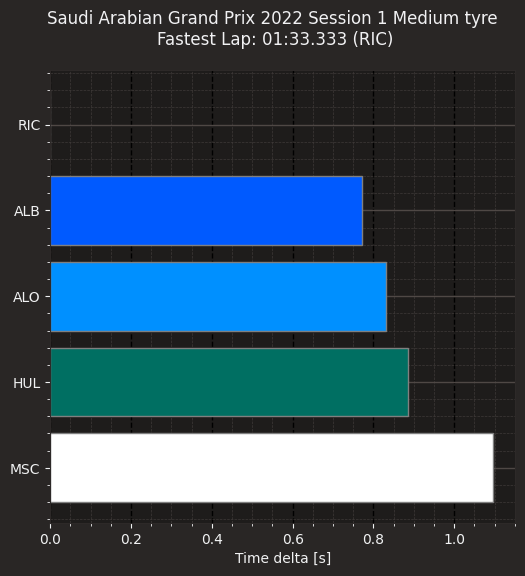

In [48]:
medium_laps = laps[laps.Compound=='MEDIUM']
# Get the pole lap
drivers = pd.unique(medium_laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = medium_laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 Medium tyre \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

['VER' 'SAI' 'HAM' 'OCO' 'HUL' 'ZHO' 'ALB' 'TSU' 'STR' 'LEC' 'ALO' 'PER'
 'GAS' 'LAT' 'NOR' 'RIC' 'RUS' 'BOT']


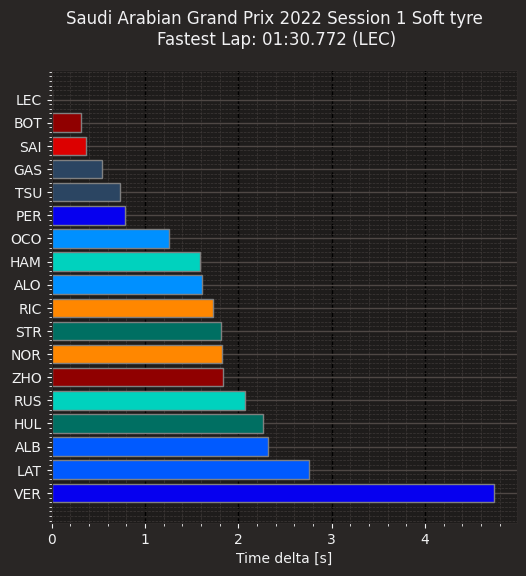

In [53]:
soft_laps = laps[laps.Compound=='SOFT'].pick_accurate()
# Get the pole lap
drivers = pd.unique(soft_laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = soft_laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 Soft tyre \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

['VER' 'SAI' 'MSC' 'OCO' 'ZHO' 'TSU' 'STR' 'LEC' 'PER' 'GAS' 'LAT' 'NOR'
 'BOT']


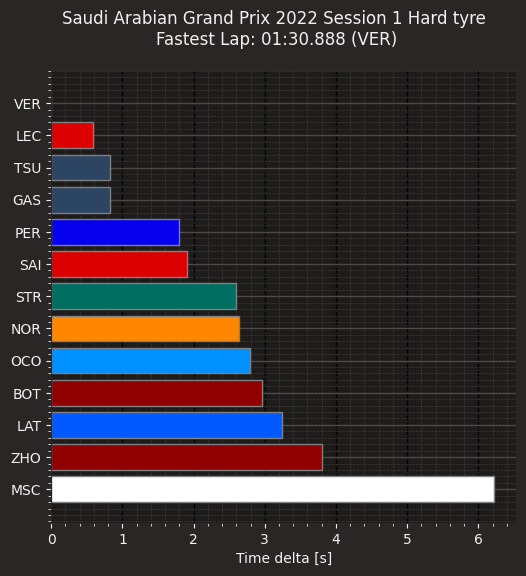

In [56]:
hard_laps = laps[laps.Compound=='HARD']
# Get the pole lap
drivers = pd.unique(hard_laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = hard_laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event.EventName} {session.event.year} Session 1 Hard tyre \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

In [57]:
laps.pick_driver('VER')

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
1,0 days 00:19:49.757000,1,0 days 00:01:34.167000,2,1,NaT,NaT,0 days 00:00:35.003000,0 days 00:00:29.904000,0 days 00:00:29.260000,...,294.0,327.0,HARD,2.0,True,0 days 00:18:15.590000,Red Bull Racing,VER,1,True
2,0 days 00:21:47.672000,1,0 days 00:01:57.915000,3,1,NaT,NaT,0 days 00:00:43.065000,0 days 00:00:41.143000,0 days 00:00:33.707000,...,297.0,284.0,HARD,3.0,True,0 days 00:19:49.757000,Red Bull Racing,VER,1,True
3,0 days 00:23:19.557000,1,0 days 00:01:31.885000,4,1,NaT,NaT,0 days 00:00:33.945000,0 days 00:00:29.226000,0 days 00:00:28.714000,...,297.0,331.0,HARD,4.0,True,0 days 00:21:47.672000,Red Bull Racing,VER,1,True
4,0 days 00:25:38.965000,1,0 days 00:02:19.408000,5,1,NaT,NaT,0 days 00:00:50.391000,0 days 00:00:50.234000,0 days 00:00:38.783000,...,297.0,266.0,HARD,5.0,True,0 days 00:23:19.557000,Red Bull Racing,VER,1,True
5,0 days 00:27:10.263000,1,0 days 00:01:31.298000,6,1,NaT,NaT,0 days 00:00:33.825000,0 days 00:00:29.070000,0 days 00:00:28.403000,...,296.0,330.0,HARD,6.0,True,0 days 00:25:38.965000,Red Bull Racing,VER,1,True
6,0 days 00:29:28.214000,1,0 days 00:02:17.951000,7,1,NaT,NaT,0 days 00:00:54.815000,0 days 00:00:49.025000,0 days 00:00:34.111000,...,298.0,272.0,HARD,7.0,True,0 days 00:27:10.263000,Red Bull Racing,VER,1,True
7,0 days 00:30:59.102000,1,0 days 00:01:30.888000,8,1,NaT,NaT,0 days 00:00:33.507000,0 days 00:00:28.980000,0 days 00:00:28.401000,...,297.0,329.0,HARD,8.0,True,0 days 00:29:28.214000,Red Bull Racing,VER,1,True
10,0 days 00:49:50.219000,1,0 days 00:01:56.024000,11,2,NaT,NaT,0 days 00:00:33.428000,0 days 00:00:37.020000,0 days 00:00:45.576000,...,218.0,160.0,SOFT,3.0,True,0 days 00:47:54.195000,Red Bull Racing,VER,1,True
11,0 days 00:52:13.303000,1,0 days 00:02:23.084000,12,2,NaT,NaT,0 days 00:00:51.711000,0 days 00:00:52.555000,0 days 00:00:38.818000,...,297.0,227.0,SOFT,4.0,True,0 days 00:49:50.219000,Red Bull Racing,VER,1,True
14,0 days 01:04:01.265000,1,0 days 00:01:36.267000,15,3,NaT,NaT,0 days 00:00:35.633000,0 days 00:00:30.721000,0 days 00:00:29.913000,...,281.0,305.0,SOFT,7.0,False,0 days 01:02:24.998000,Red Bull Racing,VER,1,True
